In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Data Exploration
df = pd.read_csv('./data/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


[]

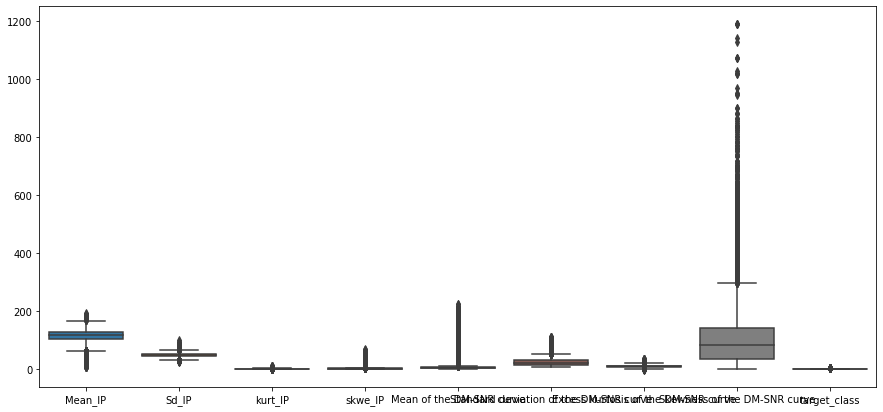

In [268]:

#Renaming columns:
cust_names = {' Mean of the integrated profile': 'Mean_IP', 
             ' Standard deviation of the integrated profile': 'Sd_IP',
             ' Excess kurtosis of the integrated profile':'kurt_IP',
             ' Skewness of the integrated profile':'skwe_IP'}
df.rename(columns=cust_names, inplace=True)
df.columns = df.columns.str.strip()
#Checking for null values
df.isnull().sum()

#Plotting Boxplot to do a rough check on outliers
dims = (15,7)
fig, ax = plt.subplots(figsize=dims)
ax = sb.boxplot(data=df)
ax.plot()



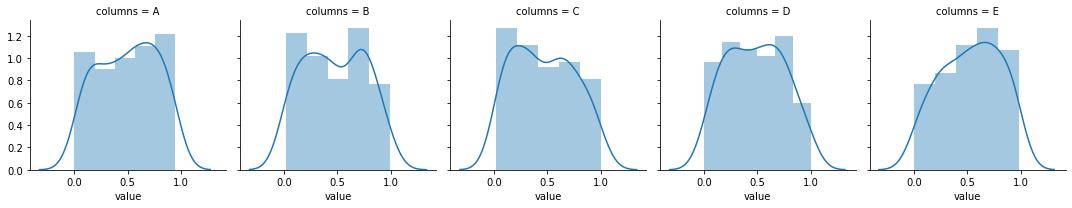

In [269]:
df_test = pd.DataFrame(np.random.random((100,5)), columns = list('ABCDE'))
dfm = df_test.melt(var_name='columns')
g = sb.FacetGrid(dfm, col='columns')
g = (g.map(sb.distplot, 'value'))

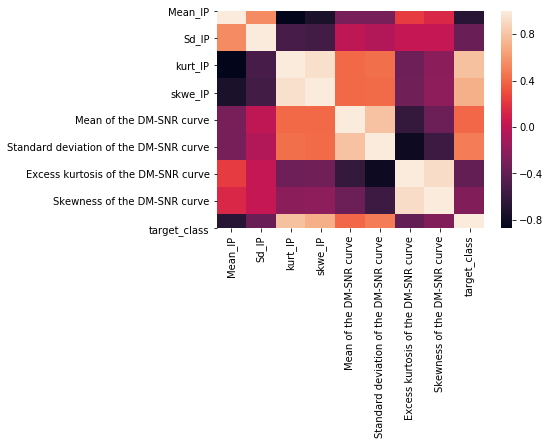

In [270]:
df_corr = df.corr()
sb.heatmap(data=df_corr)

In [271]:
def residue(x, y):
    return x - y

def sumOfSquares(series):
    m = np.mean(series)
    loc_data = series.apply(residue, args=(m,))
    loc_data = loc_data.apply(lambda x: x*x)
    return loc_data.sum()

def Sxy(series1, series2):
    x_bar = np.mean(series1)
    y_bar = np.mean(series2)
    sumX = series1.apply(residue, args=(x_bar,))
    sumY = series2.apply(residue, args=(y_bar,))
    result = sumX.multiply(sumY)
    return result.sum()
    

def linearRegression(x, y):
    slope = Sxy(x,y)/sumOfSquares(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    intercept = y_bar - (slope*x_bar)
    print("Slope is:  {}   Intercept is {}".format(slope, intercept))
    return {'slope': slope, 'intercept':intercept}

    


In [272]:
from sklearn.linear_model import LinearRegression

X = df[['Mean_IP']]
y = df[['kurt_IP']]

model = LinearRegression()
model.fit(X, y)

myModelResult = linearRegression(df['Mean_IP'], df['kurt_IP'])

#Compare Results with sklearn
if round(float(model.coef_),5) == round(myModelResult['slope'],5):
    print("Perfect Match")
else:
    print("No Match")

Slope is:  -0.0362478045891814   Intercept is 4.504262244441273
Perfect Match
